# DATASET: Salarios Ciberseguridad



- Una colección de la escala salarial para las personas que trabajan en el area de la seguridad cibernética.



In [ ]:
install.packages('VIM')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘car’, ‘ranger’




In [ ]:
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)

corrplot 0.92 loaded



# CARGAMOS LIBRERIAS NECESARIAS

In [ ]:
library(tidyverse)
library(VIM)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# CARGAMOS LOS DATOS

In [ ]:
datos<- read.csv("salaries_cyber.csv", sep = ',')

# ANÁLISIS EXPLORATÓRIO DEL DATA-SET

**Vista general del dataset**

In [ ]:
head(datos)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
2,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
3,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
4,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
5,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
6,2022,EX,FT,Application Security Architect,315000,USD,315000,US,100,US,L


**Para ver el nombre de las columnas**

In [ ]:
names(datos)

[1] "work_year"          "experience_level"   "employment_type"   
 [4] "job_title"          "salary"             "salary_currency"   
 [7] "salary_in_usd"      "employee_residence" "remote_ratio"      
[10] "company_location"   "company_size"

**Muestra la estructura del Objeto 'datos'**

In [ ]:
str(datos)

'data.frame':	1247 obs. of  11 variables:
 $ work_year         : int  2022 2022 2022 2022 2022 2022 2022 2022 2021 2022 ...
 $ experience_level  : chr  "EN" "MI" "MI" "MI" ...
 $ employment_type   : chr  "FT" "FT" "FT" "FT" ...
 $ job_title         : chr  "Cyber Program Manager" "Security Analyst" "Security Analyst" "IT Security Analyst" ...
 $ salary            : int  63000 95000 70000 250000 120000 315000 220000 140000 55000 360000 ...
 $ salary_currency   : chr  "USD" "USD" "USD" "BRL" ...
 $ salary_in_usd     : int  63000 95000 70000 48853 120000 315000 220000 140000 75650 360000 ...
 $ employee_residence: chr  "US" "US" "US" "BR" ...
 $ remote_ratio      : int  50 0 0 50 100 100 100 100 50 100 ...
 $ company_location  : chr  "US" "US" "US" "BR" ...
 $ company_size      : chr  "S" "M" "M" "L" ...


# **Convertimos todas las variables tipo 'chr' a una variable de tipo 'Factor'**

In [ ]:
df <- datos%>%mutate_if(is.character, as.factor)
str(df) 

'data.frame':	1247 obs. of  11 variables:
 $ work_year         : int  2022 2022 2022 2022 2022 2022 2022 2022 2021 2022 ...
 $ experience_level  : Factor w/ 4 levels "EN","EX","MI",..: 1 3 3 3 1 2 4 4 3 2 ...
 $ employment_type   : Factor w/ 4 levels "CT","FL","FT",..: 3 3 3 3 1 3 3 3 3 3 ...
 $ job_title         : Factor w/ 87 levels "Application Security Analyst",..: 14 65 65 49 15 2 75 75 40 42 ...
 $ salary            : int  63000 95000 70000 250000 120000 315000 220000 140000 55000 360000 ...
 $ salary_currency   : Factor w/ 21 levels "AUD","BRL","CAD",..: 20 20 20 2 20 20 20 20 7 20 ...
 $ salary_in_usd     : int  63000 95000 70000 48853 120000 315000 220000 140000 75650 360000 ...
 $ employee_residence: Factor w/ 58 levels "AE","AF","AR",..: 56 56 56 9 10 56 56 56 24 55 ...
 $ remote_ratio      : int  50 0 0 50 100 100 100 100 50 100 ...
 $ company_location  : Factor w/ 55 levels "AE","AF","AQ",..: 53 53 53 10 11 53 53 53 24 48 ...
 $ company_size      : Factor w/ 3 levels "L","

In [ ]:
df <- datos%>%mutate_if(is.factor, as.numeric)
str(df) 

'data.frame':	1247 obs. of  11 variables:
 $ work_year         : int  2022 2022 2022 2022 2022 2022 2022 2022 2021 2022 ...
 $ experience_level  : chr  "EN" "MI" "MI" "MI" ...
 $ employment_type   : chr  "FT" "FT" "FT" "FT" ...
 $ job_title         : chr  "Cyber Program Manager" "Security Analyst" "Security Analyst" "IT Security Analyst" ...
 $ salary            : int  63000 95000 70000 250000 120000 315000 220000 140000 55000 360000 ...
 $ salary_currency   : chr  "USD" "USD" "USD" "BRL" ...
 $ salary_in_usd     : int  63000 95000 70000 48853 120000 315000 220000 140000 75650 360000 ...
 $ employee_residence: chr  "US" "US" "US" "BR" ...
 $ remote_ratio      : int  50 0 0 50 100 100 100 100 50 100 ...
 $ company_location  : chr  "US" "US" "US" "BR" ...
 $ company_size      : chr  "S" "M" "M" "L" ...


In [ ]:
x <- as.numeric(df$job_title)
y <- df$salsalary_in_usdary

# **Buscamos y visualizamos los Valores Nulos**

In [ ]:
aggr(df, plot = F, numbers = T, prop = T)


 Missings in variables:
[1] Variable Count   
<0 rows> (or 0-length row.names)


 Variables sorted by number of missings: 
           Variable Count
          work_year     0
   experience_level     0
    employment_type     0
          job_title     0
             salary     0
    salary_currency     0
      salary_in_usd     0
 employee_residence     0
       remote_ratio     0
   company_location     0
       company_size     0


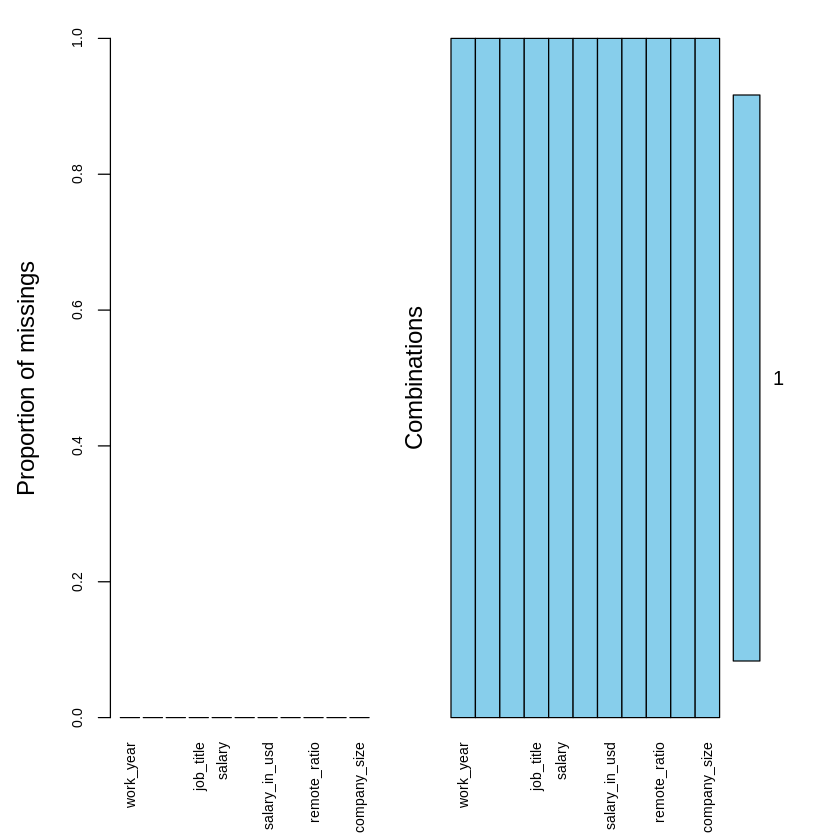

In [ ]:
aggr(df, plot = T, numbers = T, prop = T, combined= F, sortVars = T, cex.axis=.7, gap=3)

# **Miramos la Matriz de Correlacion**

In [ ]:
head(df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
2,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
3,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
4,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
5,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
6,2022,EX,FT,Application Security Architect,315000,USD,315000,US,100,US,L


[1] 14 65 65 49 15  2 75 75 40 42 76  4 17 76 32 32 32 70 15 31 15 17  6 27
  [25] 27 51  3  6 85 18 38 60 16 44 77 77 27 58 23  8 45 49 66 15 46 65 45 44
  [49] 58 17 77 15 27 27 29 68 68 41 81  8 83 83 27 27 65 68 68 70 49 68 68 68
  [73] 68 50  9  1 24 24 25 76 76 68 68 68 68 25 25  6 15 62 32 49 47 79 68 68
  [97] 68 68 76 76 43 38 42 68 68 86 86 68 68 65 45 45 75 32 32 15 15 15  5  5
 [121] 15 66 73 73 68 68 18 29 43 50 26 15 15 68 68 25 25 68 68 58 58 68 68 68
 [145] 68 65 77  8 76 76 83 68 68 71 71 58 68 68 77 77 65 65 68 68 68 68 68 76
 [169] 76 68 68 68 68 68 68 68 68 66  3 58 25 25 66 66 68 68 68 68 76 76 65 65
 [193] 68 68 68 68 51 51 68 68 45 45 27 27 25 25 65 65 68 68 68 68 65 65 58 58
 [217] 68 68 67 67 76 76 68 68 68 68 68 68 68 68 65 65 68 68 65 65 68 68 58 58
 [241] 67 67 44 44 58 58 68 68 68 68 58 58 68 68 68 68 27 27 68 68 27 27 66 66
 [265] 66 66 68 68 68 68 68 68 68 68 68 68 68 68 85 85 68 68 68 68 68 68 68 68
 [289] 68 68 65 65 45 45 68 68 68 68 68 68 68 68 67 67 23 23 45 45 68 68 65 65
 [313] 68 68 68 68 68 68 68 68 65 65 68 68 68 68 68 68 68 68 68 68 68 68 68 68
 [337] 65 65 68 68 68 68 68 68 68 68 27 27 27 27 68 68 15 68 44 66 29 16 62 66
 [361] 16 62 44 87 38 23 10 15 74 35 16 75 23  1 23 44 23 49 75 58 58 68 18 58
 [385]  7 15 23 18  3 62 43 43 75 58 66 68 66 68 44  1 74 43 44 44 39 75 42 64
 [409] 35 35 77 38 18 15 35 26  3 18 54 38 37 68 75 15  3 39 83 68 44 86 35  8
 [433] 20 19  6 35 73 58 50 54 75 27 59 18 58 38 44 16 44 44 44 38 38  8 68 28
 [457]  1  6 22 86 16  3 48 35 15 59 35 44 38 33 38 65 58 44  5 51 51 15 77 65
 [481] 82 76 22 45 46 46 77 18 22 18 44 35 65  6 59 49 75  6 38 20 35 37 22 20
 [505] 36 33 23 65 36 18 77  6 25 44 36 13 23 15 69 15 58 65 69 75 47 23 80 39
 [529] 38 15 58 44 69 20 23 75 15 18 16 77 18 68 15 38 23 68 73 68 15 75 23 84
 [553] 23 58 18 83 83 76 37 23 15 22 51 65 75 15 25 25 77  8 15  7 57 58 18 18
 [577] 83 38 46 15 30 15 86 20 45 38 39 44 33 77 15 58 15 18 75 44 85 31 44 76
 [601] 23 36 68  6 65 51 58 18  6 15 15 58 84 58 54 58 36 43 18 33 68 26 58 15
 [625] 39  6 38 77 83 23 36 39 15 33 44 26 76  7 23 64 44 83 33 36 51 25 83 37
 [649] 46 56 38 69  7 43 16  3  3 63  8  6 18 20 54 68 68 59 68 50 33 18 49 22
 [673] 65 65 15 15 18 44 44 44 83 44 15 51 51 51 20  6 15 55 15 38 68 46 51 22
 [697] 15 15 47 15 49 46 46 43 15 55 58 15 15 15 28 45 68 38 58 78 65 18 68 63
 [721] 22 65 65 51 15 44 33 77 44 58 18 38 18 38  8 16  8 15 21 20 15 83 45 23
 [745] 64 44 38  6 15 16 68 15 77 15 49 18 18  8 58 50 39 15 46 27 58 27 15 37
 [769] 44 15 18 49 15 58 54 68 18 18 45 35 15 15 15 38 15 44 15 38 18 77 33 69
 [793] 15 38 18 50 44 16 58 44 65 15 15 50 43 50 87 58 20 37 15  8 23 58  6 15
 [817] 68 68 79 15 15 35 44 47 15 77 15 15 38 18 15 57 43 77 59 20 45 44 34 34
 [841] 68 68 69 15 15 58 16 22  6 50 31 62 44 77 77 44 15 48 15 44 44 18 44 22
 [865] 77 15 61 65 50 35 15 15 18 15 15  6 18 15 20 44 15 44 39  6 15 58 69 16
 [889] 15 65 18 15 38 49 68 65 64 43 68 44  6 77 18 44 44 43 46 18 53 15 53 46
 [913] 77 18 15 33 45 54 15  6 39 44 20 45 44 33 15  6 38 56 18 43 44 38 35 45
 [937] 58 18 37  3 44 64 15 44 55 15 20 49 55 58 58 58  6  8 58 12 37 58 77 59
 [961] 15  3  3 77 37 44 15 15 18 15 25  7 20 39 65 19 18  3 45 15 38 15 15  3
 [985] 16 15 33 64 39 45 58 44 68 18 49 68 45 16 58 34 45 20 35 19 15 15 18 35
[1009] 38 64  3  9 18 43 45 68 15 23 56 49 44 15 72 22 15 65 15  8 68 69 23 50
[1033] 23 68 39 43 27 31 15 38 59 46 15 15 15 48 54 20 20  7 16 16 28 28 19 44
[1057] 31 85 15 38 15 15 43 62 16 68 43 45 20 20 20 58 15 35 19 78 44 15  3 58
[1081] 77 16 68  3 86 52 58 15 46 18 15 18 68 58 18 18 68  3 19 15 58 23 20 16
[1105] 20 69 80 38 15 20 15 22 38 65 58 18 44 23 68 15 16 61 58 20 20 68 38 18
[1129]  6 59 68 18 46 20 50 20 31 58 77 58  8 43 58 58 15 58 16 68 50 15 44  3
[1153] 18 68 15 20 39 15 16 27 68 19 15 19 46  8 18 50 68 11 38 58  6 58 58 44
[1177]  3 35 58 65 69 58 68 18 16 20 64 58 68 18 18 43 20 58 15  3 78 44 44 23
[1201] 18 23 39 19 58 18 45 70 22 83 18 38 59 50  6  

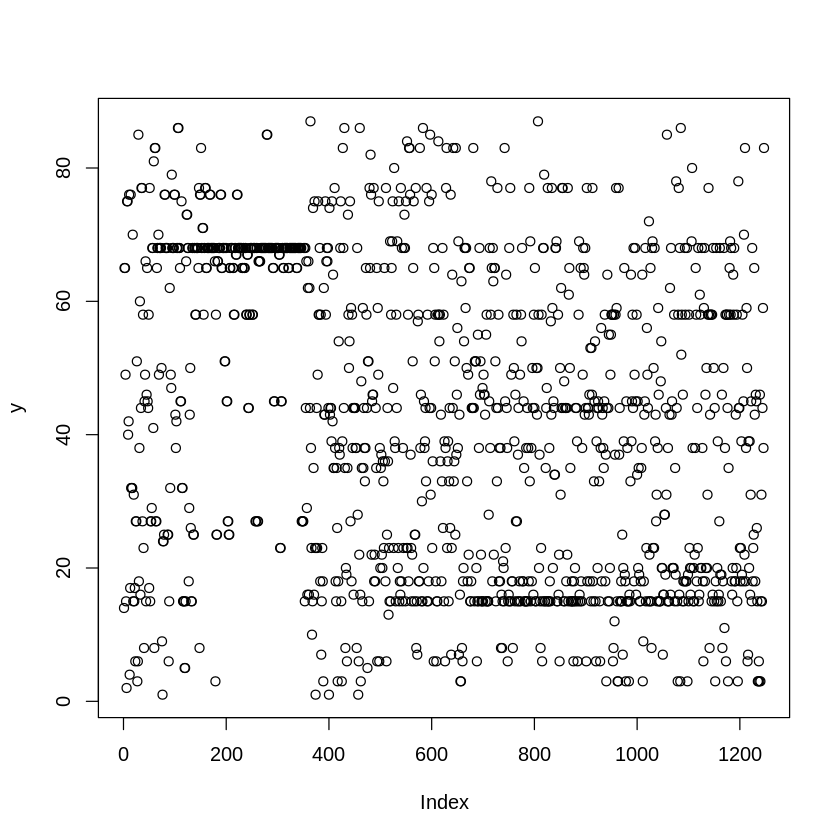

In [ ]:
plot(x=x,y=y)